In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:

from configuration import *
from figure_estimation import *
from spikeinterface.sortingcomponents.benchmark.benchmark_motion_estimation import plot_error_map_several_benchmarks

Setting KILOSORT2_5_PATH environment variable for subprocess calls to: /home/samuel.garcia/Documents/SpikeInterface/code_sorters/Kilosort2.5


In [3]:
figure_folder = base_folder / 'figures' / 'estimation'
figure_folder.mkdir(exist_ok=True, parents=True)


ext = 'png'
# ext = 'pdf'

## load benchmark from disk

In [4]:
# this is quite long
all_benchmarks = {}
for drift_mode in drift_modes:
    for cells_position in cells_positions:
        for cells_rate in cells_rates:
            all_benchmarks[(drift_mode, cells_position, cells_rate)] = \
                load_benchmarks(drift_mode, cells_position, cells_rate)
            # this fix the title
            for bench in all_benchmarks[(drift_mode, cells_position, cells_rate)].values():
                bench.title = bench.title.replace('+', ' + ').replace('_', ' ')

## summary motion estimation errors

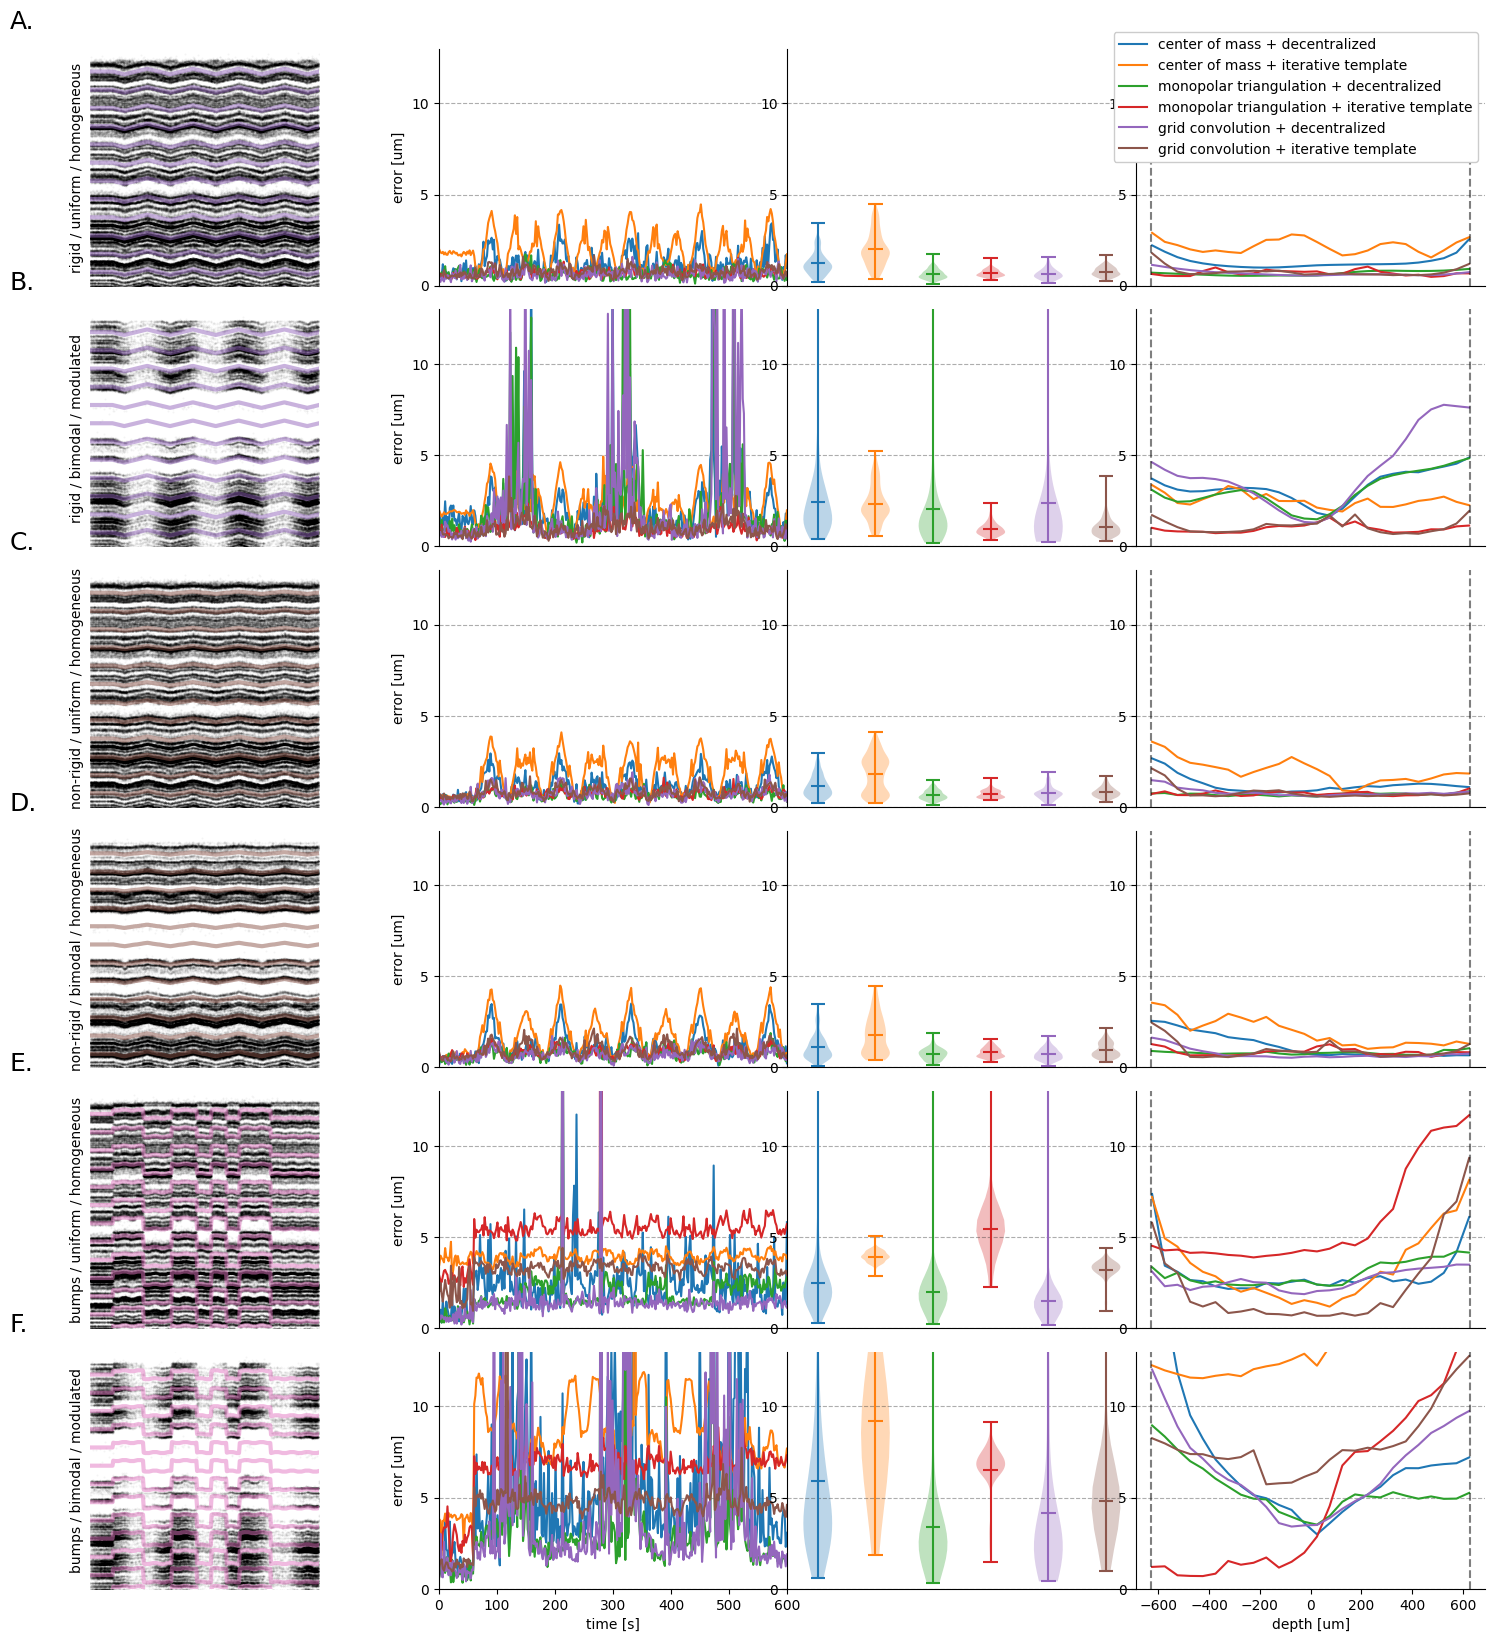

In [7]:
fig = plot_summary_errors_several_benchmarks(all_benchmarks, figsize=(18, 20))
fig.savefig(figure_folder / f'Figure4_summary_errors.{ext}')

## individual benchmark motion errors

In [27]:
all_benchmarks.keys()

dict_keys([('rigid', 'uniform', 'homogeneous'), ('rigid', 'uniform', 'modulated'), ('rigid', 'bimodal', 'homogeneous'), ('rigid', 'bimodal', 'modulated'), ('non-rigid', 'uniform', 'homogeneous'), ('non-rigid', 'uniform', 'modulated'), ('non-rigid', 'bimodal', 'homogeneous'), ('non-rigid', 'bimodal', 'modulated'), ('bumps', 'uniform', 'homogeneous'), ('bumps', 'uniform', 'modulated'), ('bumps', 'bimodal', 'homogeneous'), ('bumps', 'bimodal', 'modulated')])

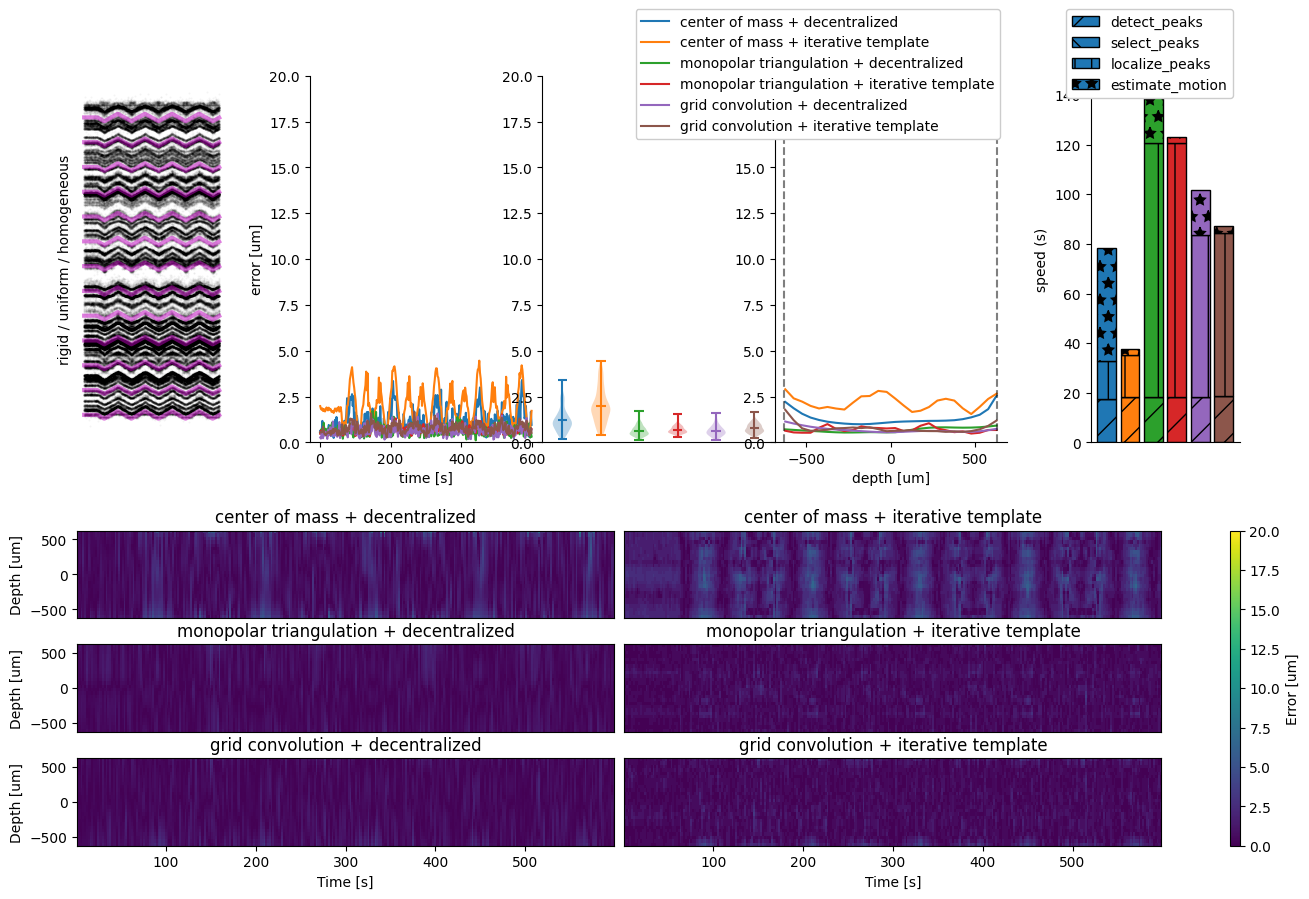

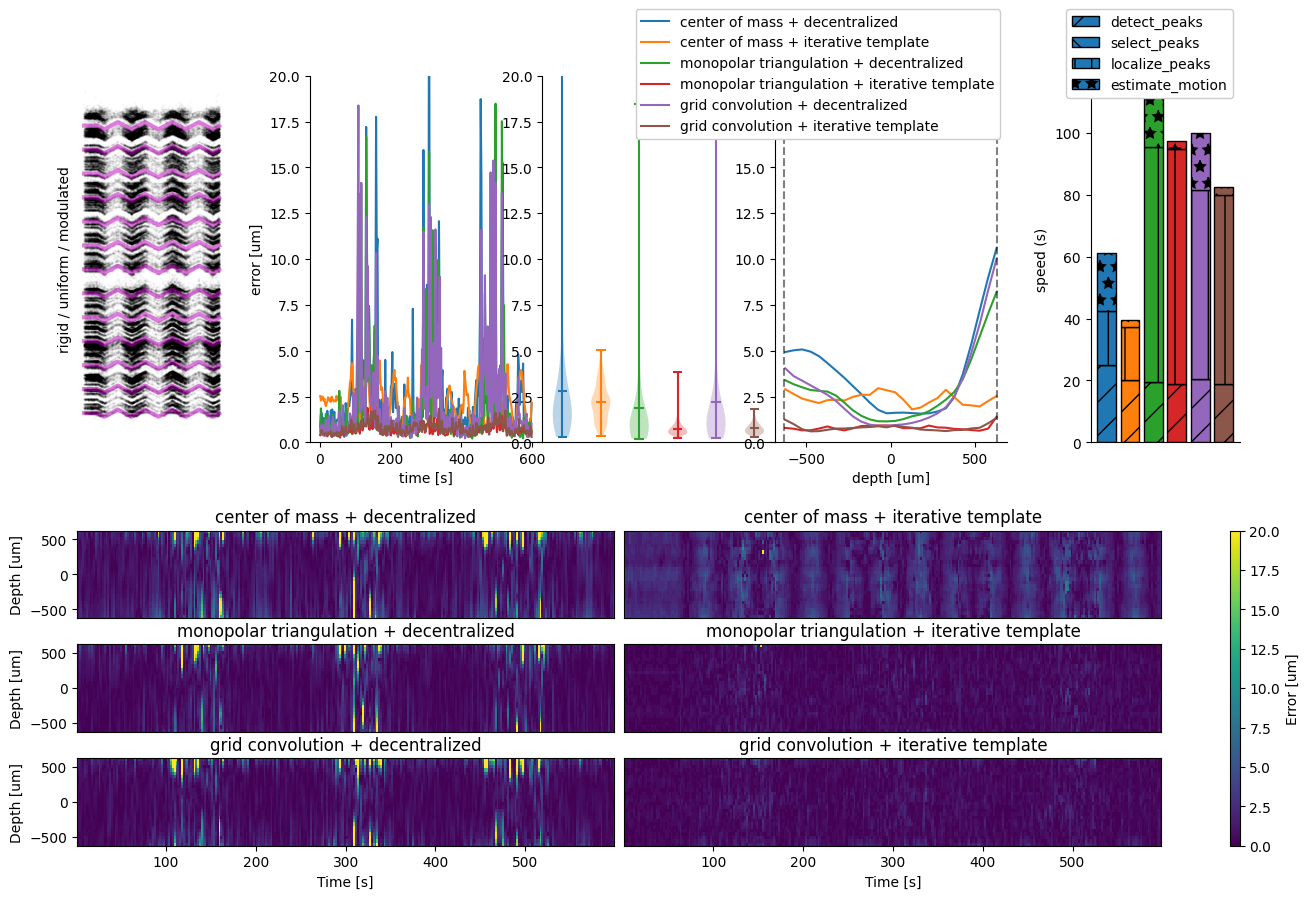

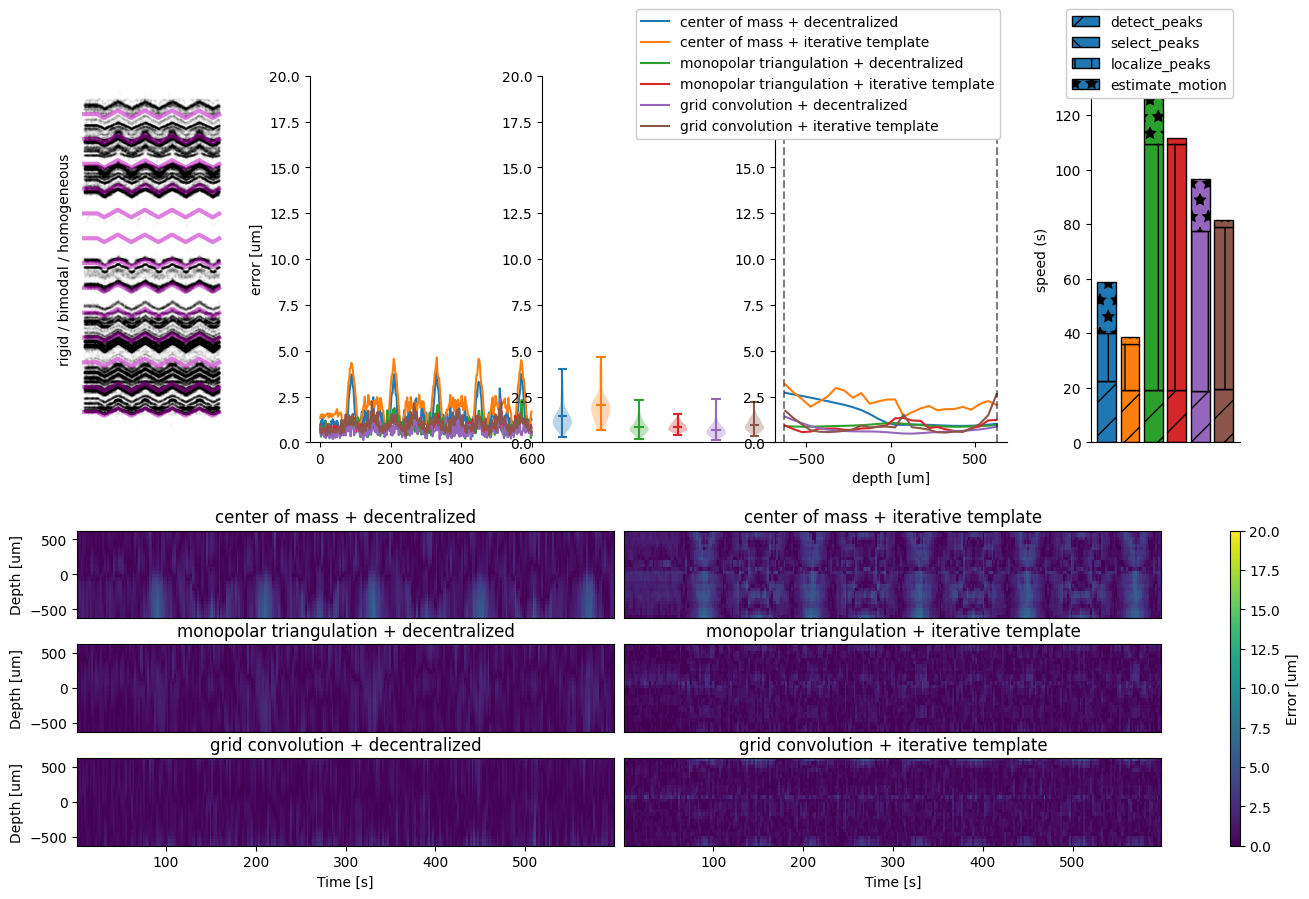

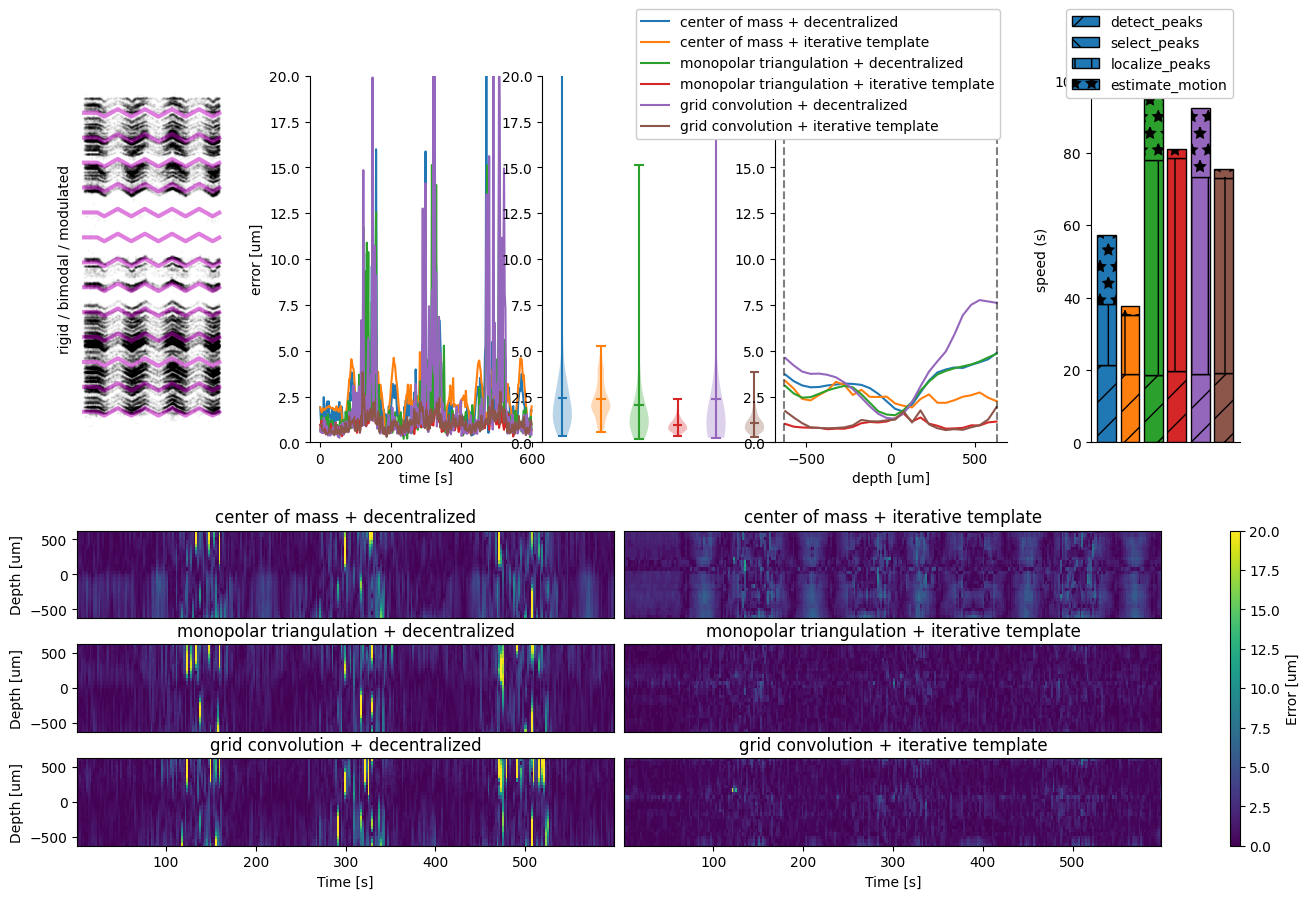

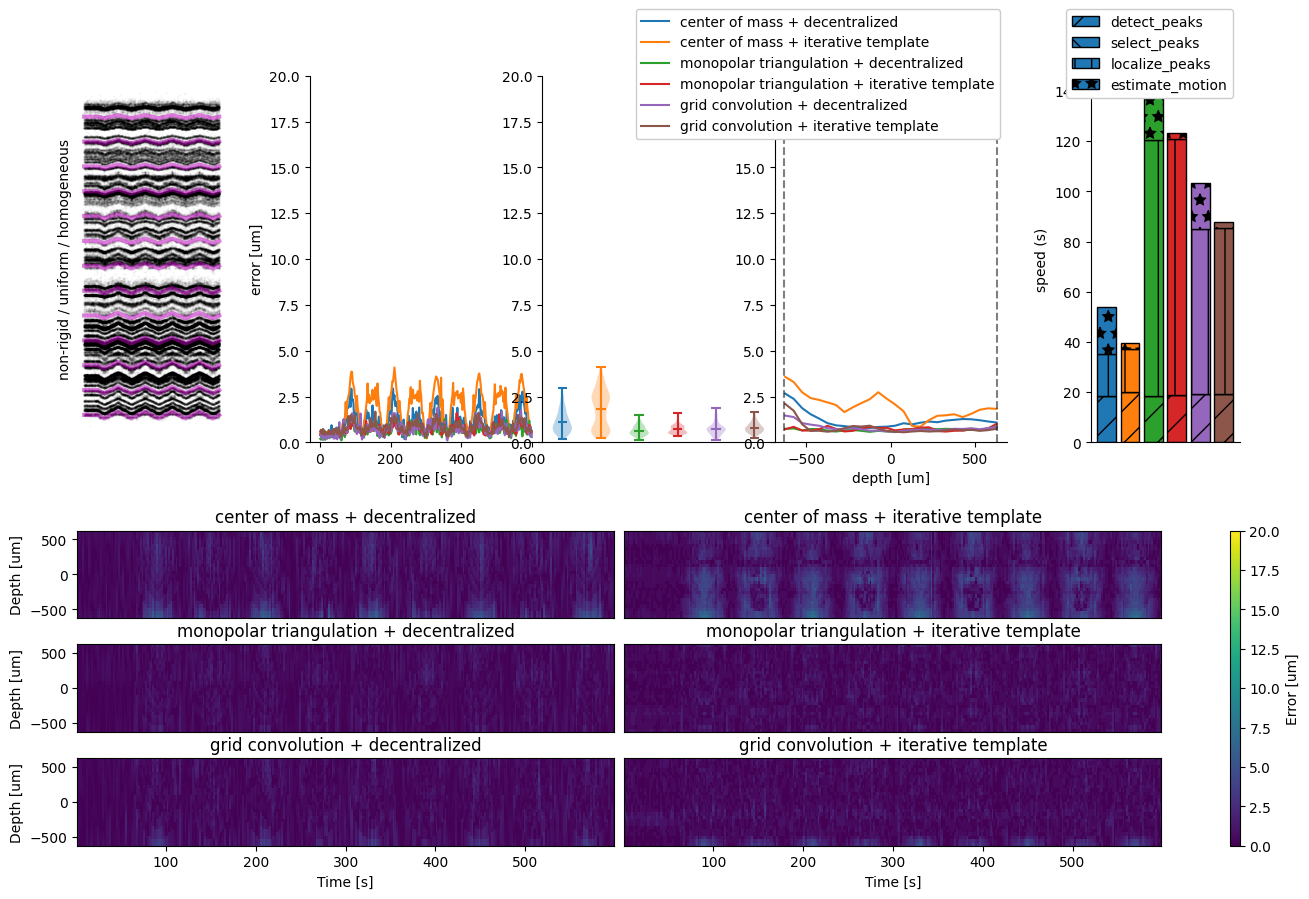

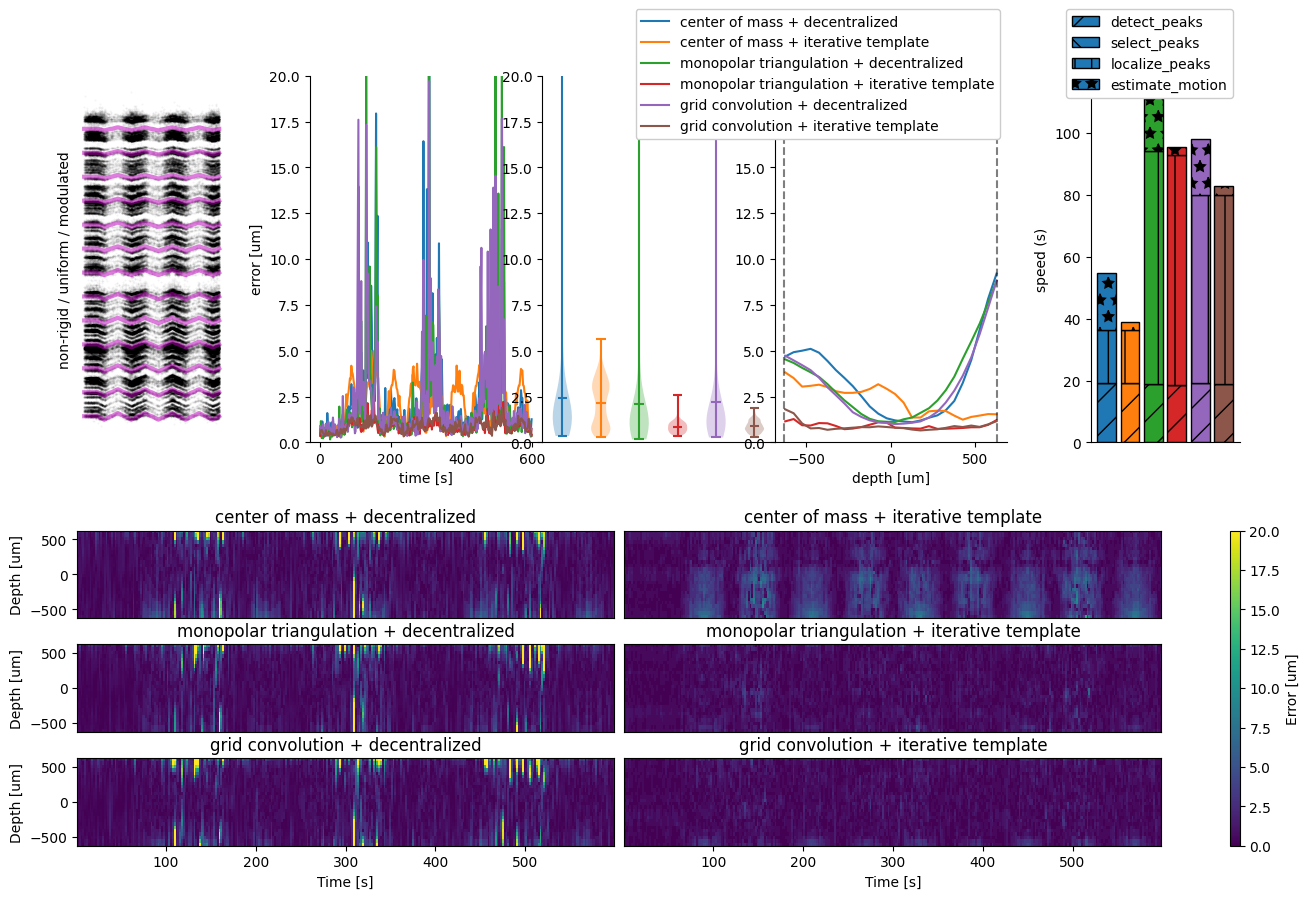

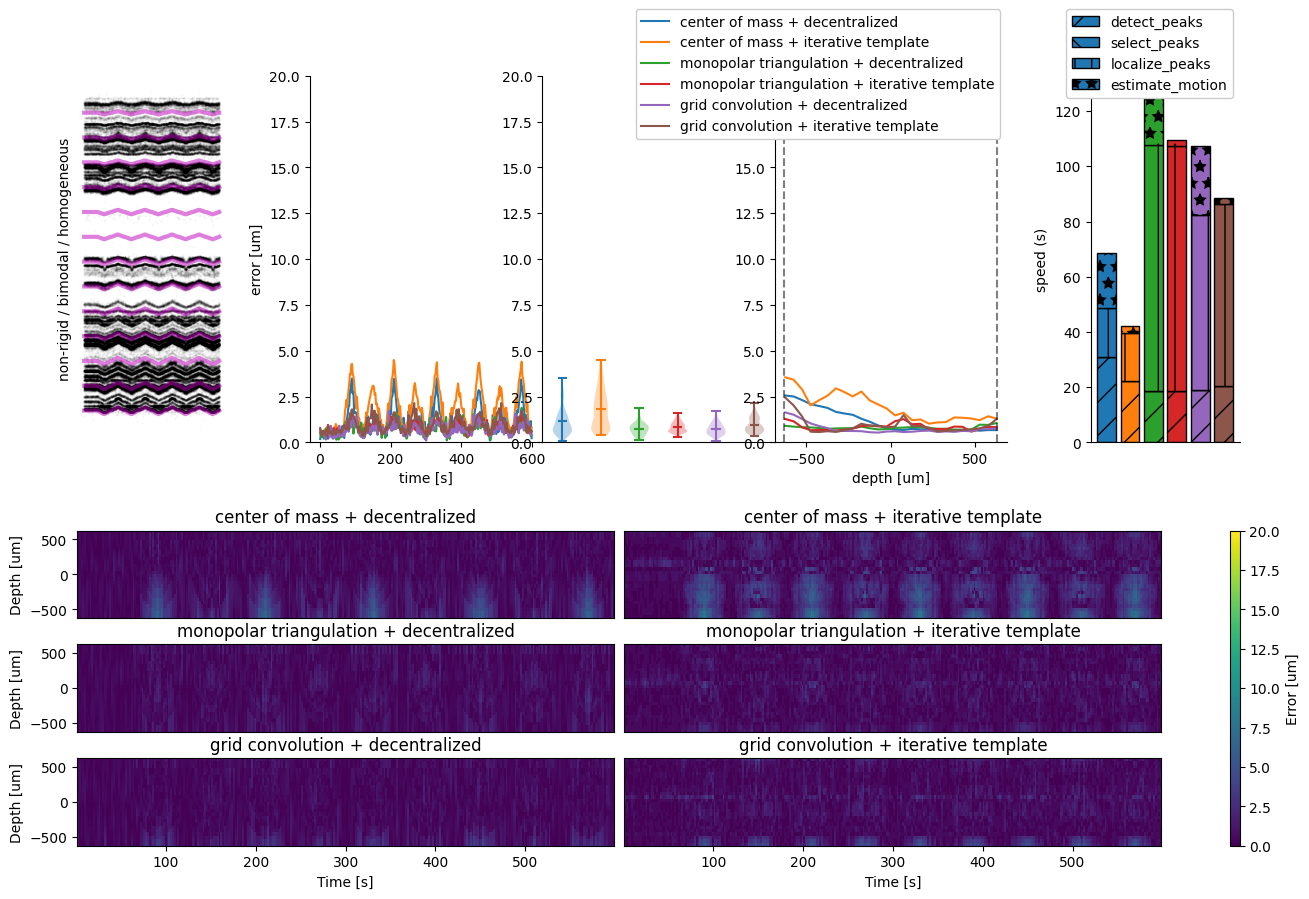

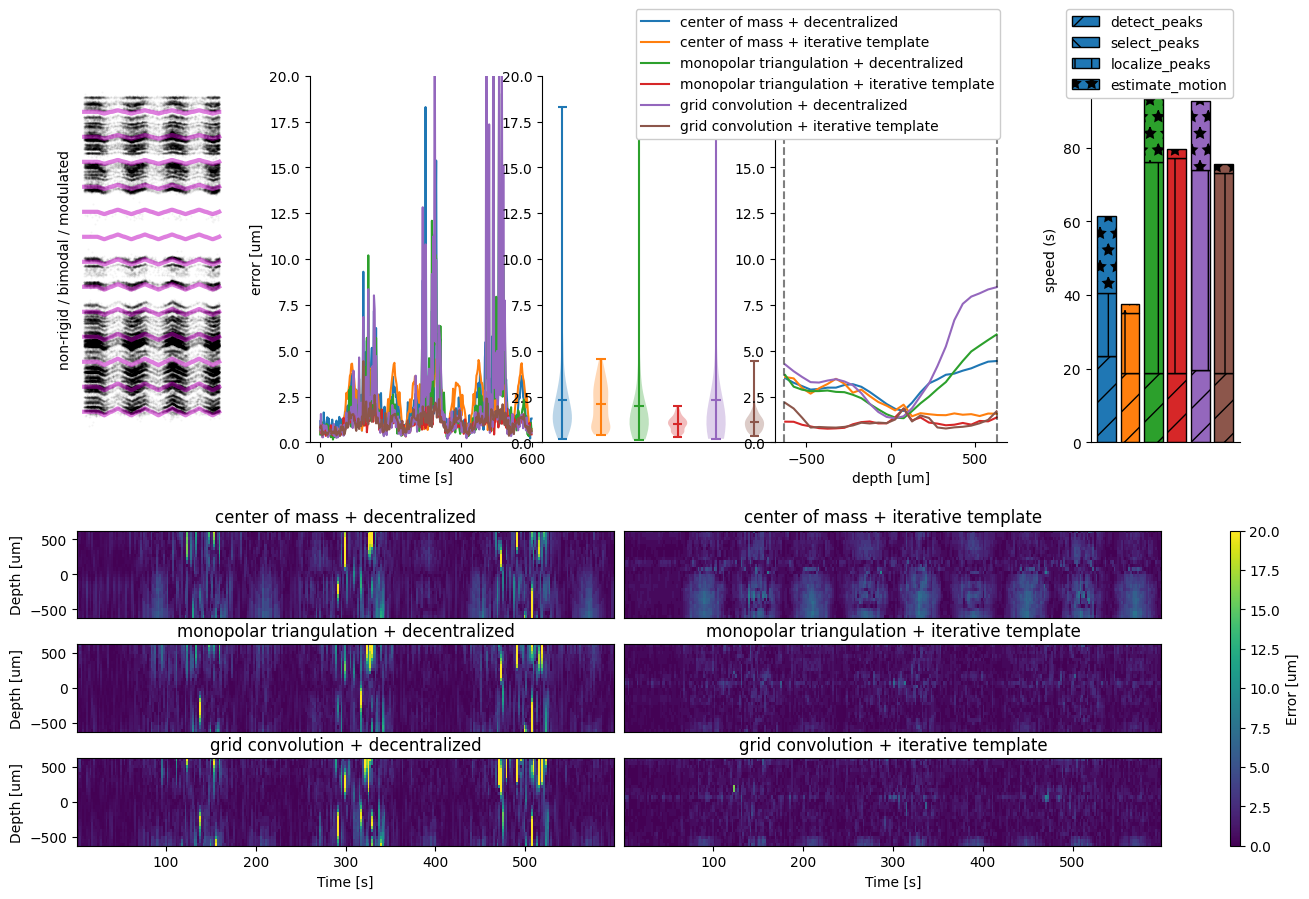

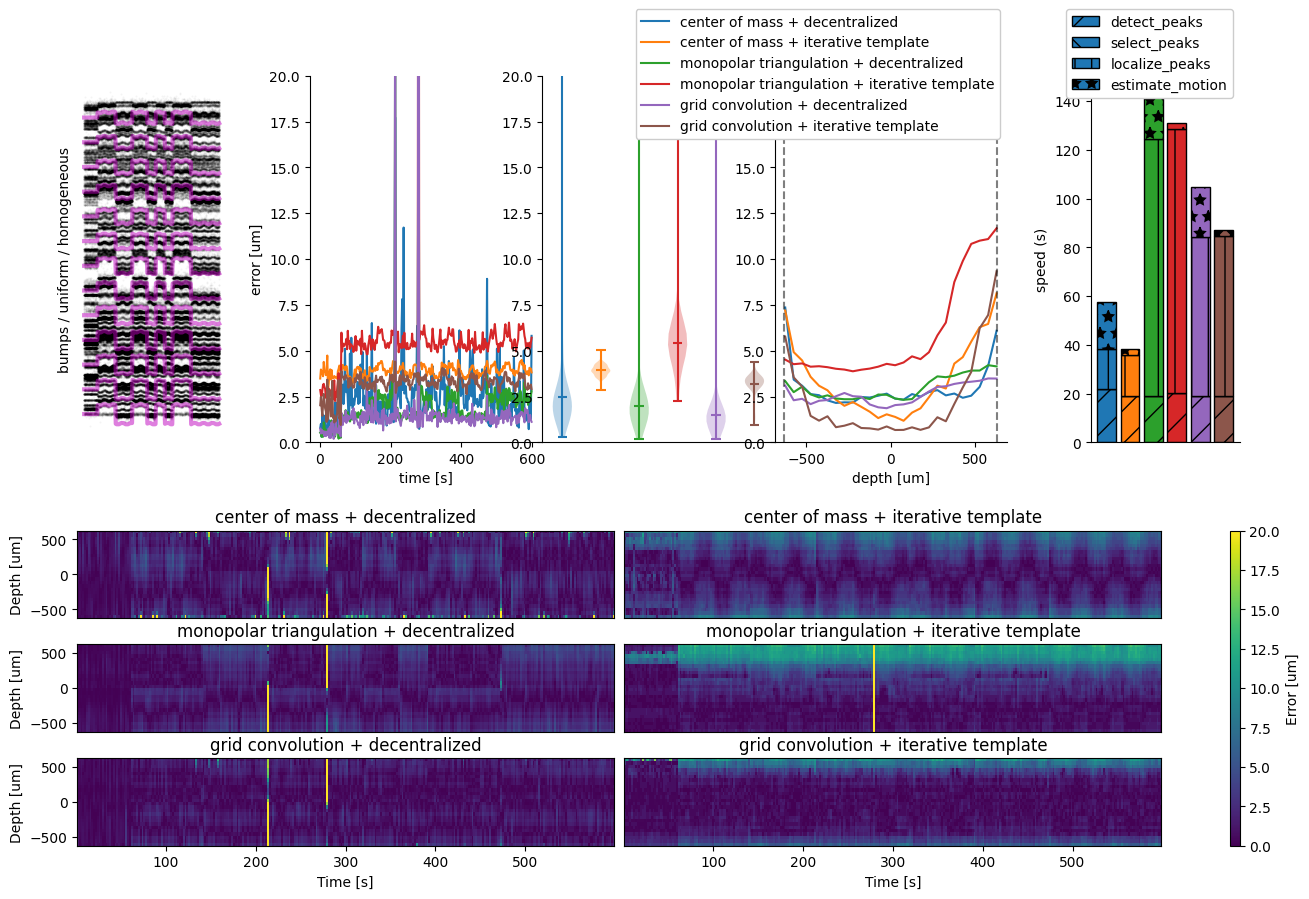

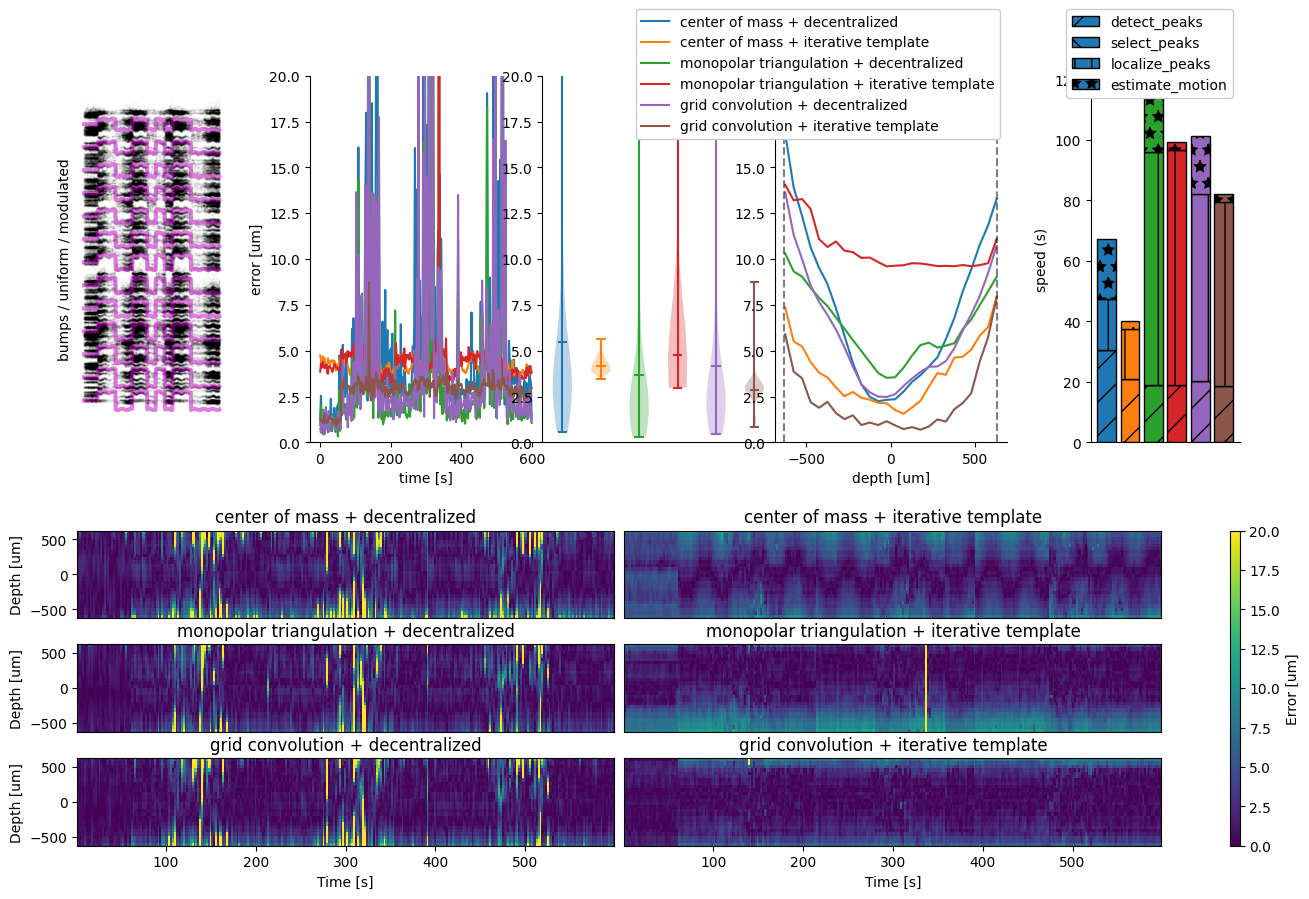

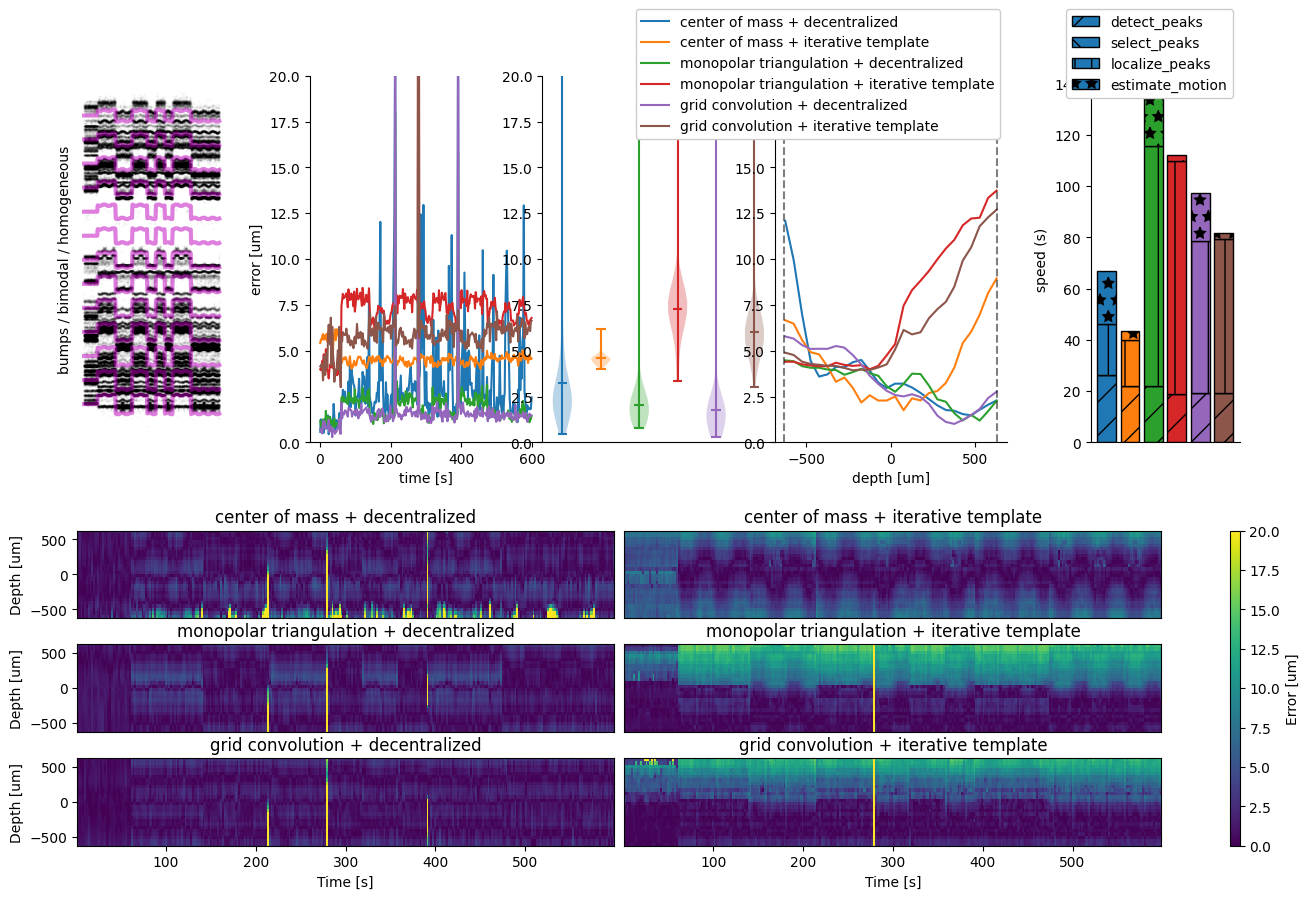

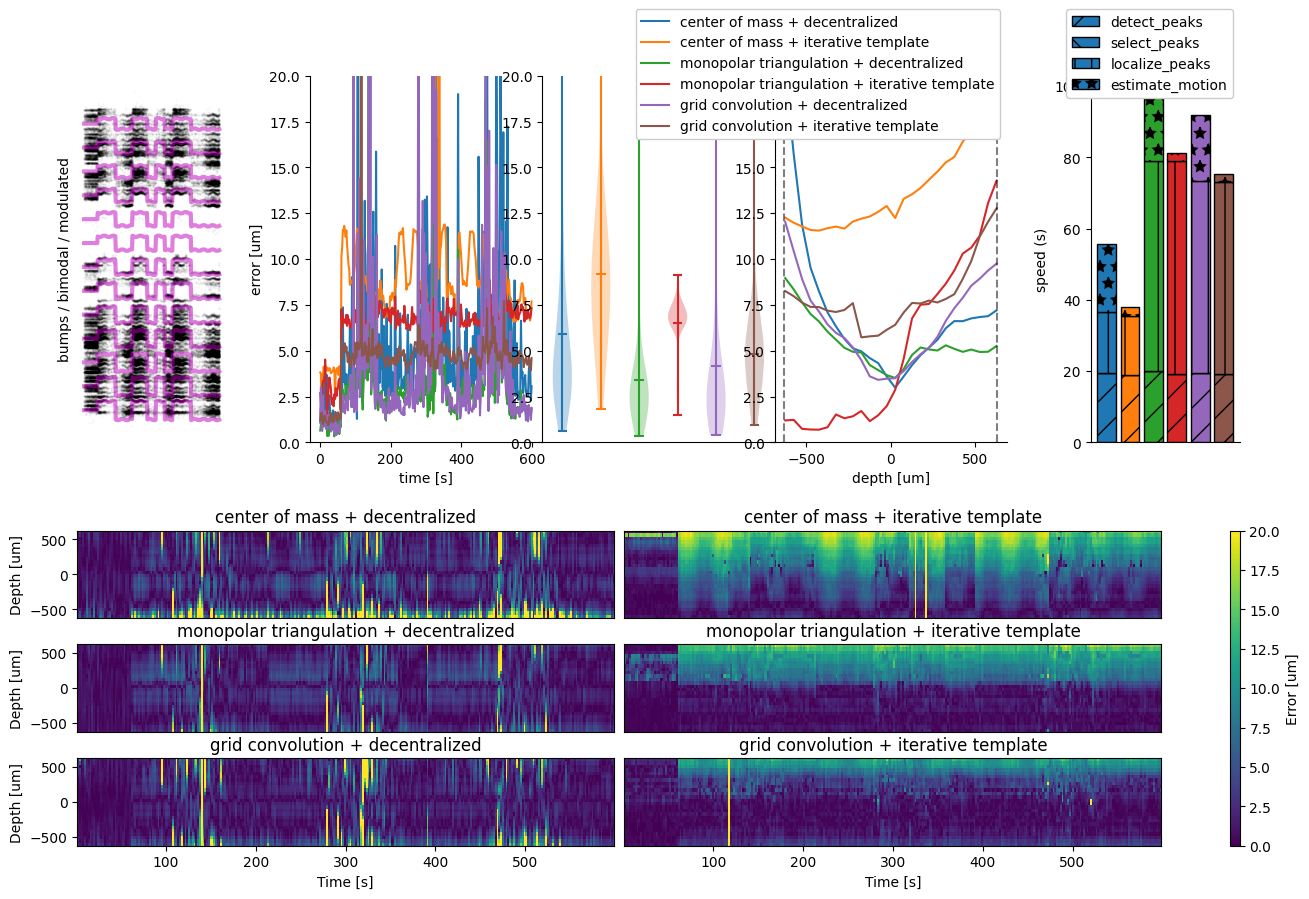

In [6]:
for key, benchmarks in all_benchmarks.items():
    label = ' / '.join(key)
    fig = plot_figure_individual_motion_benchmark(benchmarks, label=label, figsize=(15, 10))

    drift_mode, cells_position, cells_rate = key
    fig_name = f'Figure3 {probename}_{drift_mode}_{cells_position}_{cells_rate}'
    fig.savefig(figure_folder / f'{fig_name}.{ext}')

